In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Проверяем формат столбцов

In [8]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [8]:
df['Дата'] = pd.to_datetime(df['Дата'], format ='%Y-%m-%d')
print(df['Дата'].head())
print(df.dtypes)

0   2018-01-04
1   2018-01-04
2   2018-01-04
3   2018-01-04
4   2018-01-04
Name: Дата, dtype: datetime64[ns]
Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [9]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
grouped_df = grouped_df.rename(columns={'Количество': 'Количество_продаж'})

Вывести несколько первых строк сгруппированных данных

In [14]:
print(grouped_df.head())

        Дата  Количество_продаж
0 2018-01-04               3734
1 2018-01-05               3643
2 2018-01-06               3193
3 2018-01-07               3298
4 2018-01-09               4055


Нарисуйте график продаж у `grouped_df`

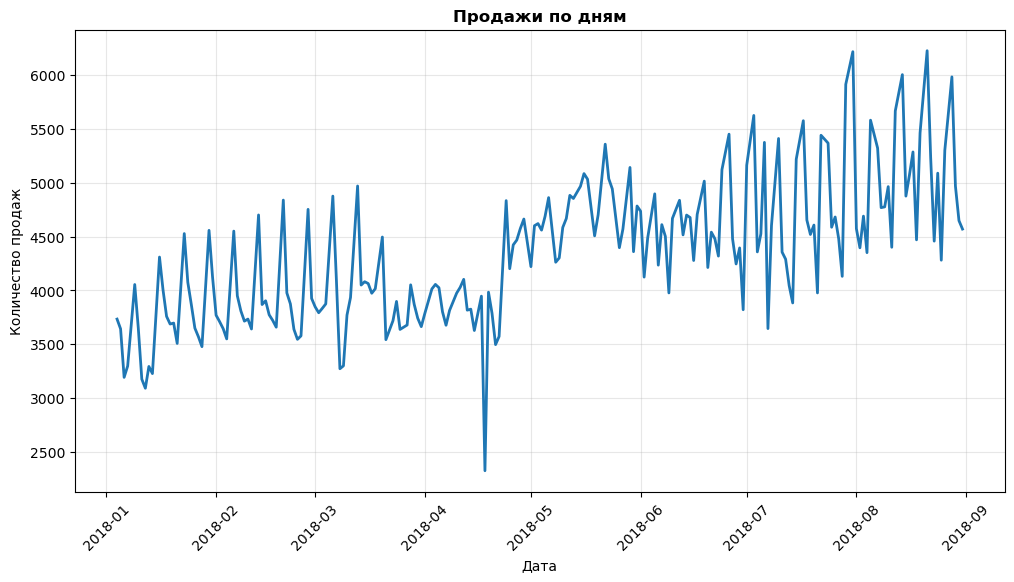

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество_продаж'], linestyle='-', linewidth=2, markersize=5)
plt.title('Продажи по дням',fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45) 
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
Согласно графику, продажи сильно колеблются в течении дня, самый спад продаж можем наблюдать 4-го числа. 
Даже при сильных колебаниях, можем наблюдать рост на 8-9-е числа. 

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [11]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

a = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_a_row = a.loc[a['Количество'].idxmax()]

print(f"\nЗначение выброса: {max_a_row['Количество']}")
print(f"Границы значений: [{lower_bound}, {upper_bound}]")


Значение выброса: 200
Границы значений: [-3.5, 8.5]


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [12]:
df_filtered = df[(df['Склад'] == 3) & (df['Дата'].dt.month.isin([6, 7, 8])) &(df['Дата'].dt.weekday == 2)]

top_products = df_filtered.groupby('Номенклатура')['Количество'].sum().reset_index()

top_product = top_products.sort_values('Количество', ascending=False).iloc[0]

print(f"Товар: {top_product['Номенклатура']}")
print(f"Количество продаж: {top_product['Количество']}")

Товар: product_1
Количество продаж: 2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [13]:
weather_data = pd.read_excel('weather2.xls')
weather_data.head()

,Дата,T
0,2018-08-31,9.6
1,2018-08-31,11.3
2,2018-08-31,12.3
3,2018-08-31,13.2
4,2018-08-31,12.5


In [3]:
!pip install xlrd>=2.0.1

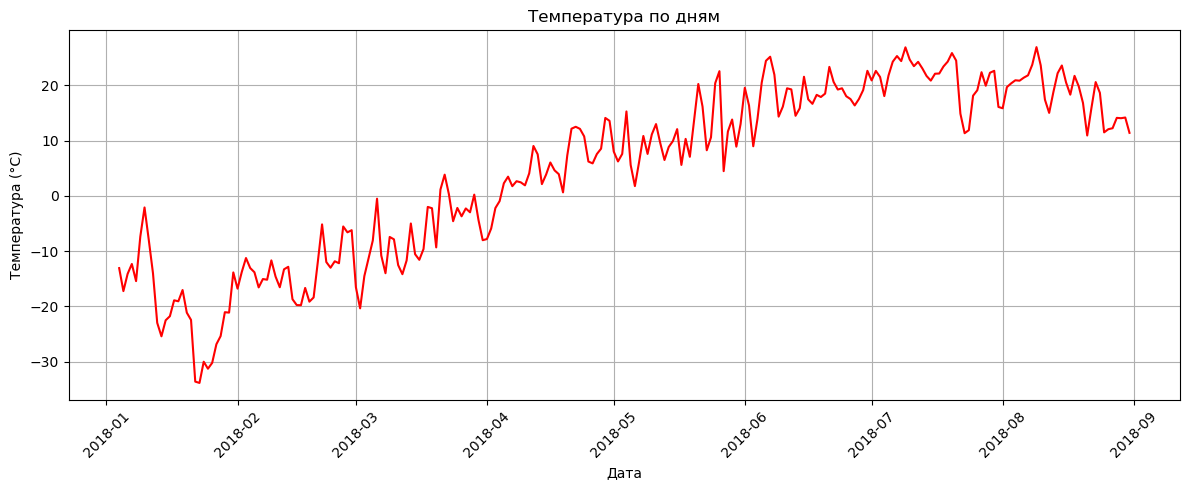

In [16]:
weather_data['Дата_день'] = weather_data['Дата'].dt.date
daily_weather = weather_data.groupby('Дата_день')['T'].mean().reset_index()  # <- 'T' вместо 'Т'
daily_weather['Дата_день'] = pd.to_datetime(daily_weather['Дата_день'])

merged_df = pd.merge(grouped_df, daily_weather, left_on='Дата', right_on='Дата_день', how='inner')

merged_df = merged_df.drop('Дата_день', axis=1)

plt.figure(figsize=(12, 5))
plt.plot(daily_weather['Дата_день'], daily_weather['T'], color='red')
plt.title('Температура по дням')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


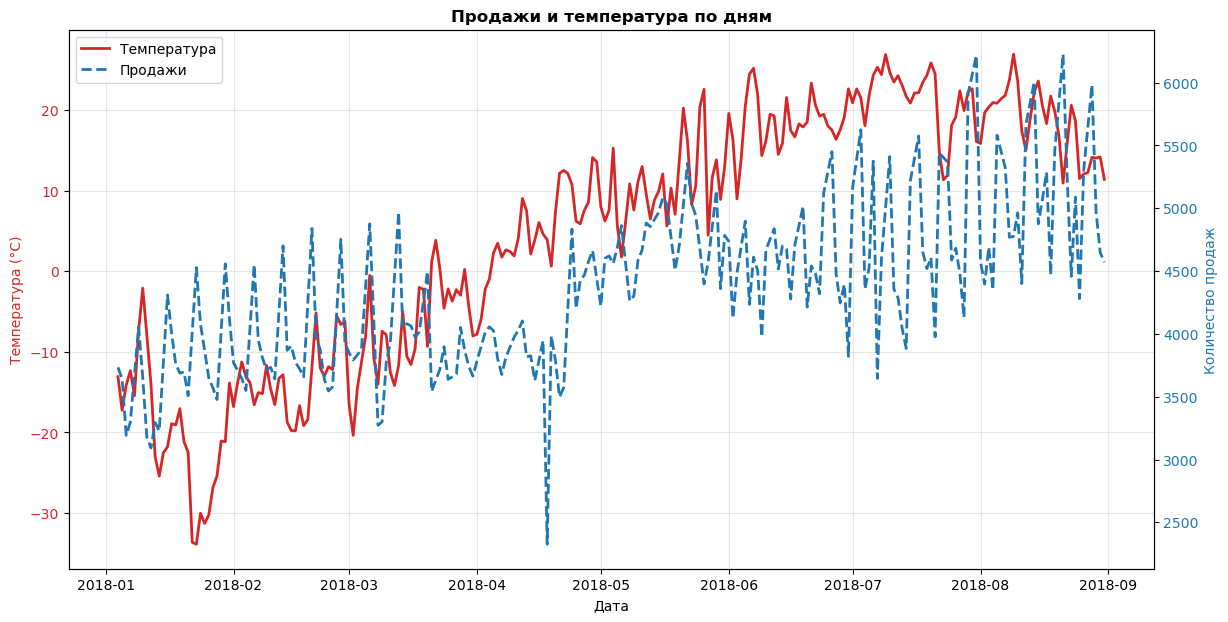

In [23]:
fig, ax1 = plt.subplots(figsize=(14, 7))

color1 = 'tab:red'
ax1.set_xlabel('Дата')
ax1.set_ylabel('Температура (°C)', color=color1)
ax1.plot(daily_weather['Дата_день'], daily_weather['T'], color=color1, linewidth=2, label='Температура')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Количество продаж', color=color2)
ax2.plot(grouped_df['Дата'], grouped_df['Количество_продаж'], color=color2, linestyle='--', linewidth=2, label='Продажи')
ax2.tick_params(axis='y', labelcolor=color2)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Продажи и температура по дням', fontweight='bold')
plt.show()